In [ ]:
#package installation
!pip install AlphaVantage

In [ ]:
#import libraries
import json
import requests
import pandas as pd
import numpy
import requests
def pretty_print (data: dict):
  print(json.dumps(data, indent=1))
from pathlib import Path

In [ ]:
# This is a prototype of function to streamline pulling and cleaning the data for all six cryptos. It has been commented out as a little further editing is needed to make it functional

# ticker_symbol_path=Path("bnb_raw_data.csv")

# def crypto_model(ticker_symbol_path):
#   df=pd.read_csv (ticker_symbol_path)
#   df1=df["Time Series (Digital Currency Daily)"].apply(pd.Series)
#   concat_df=pd.concat([df.drop("Time Series (Digital Currency Daily)", axis=1),df1],axis=1)
#   concat_df=concat_df.iloc[7:,2:]
#   concat_df=concat_df.sort_index(ascending=True)
#   concat_df=concat_df.loc["2020-08-21":,:]
#   concat_df=concat_df.drop(columns=["1a. open (CNY)","2a. high (CNY)","3a. low (CNY)","4a. close (CNY)"])
#   concat_df.rename(columns={"1b. open (USD)":"Open","2b. high (USD)":"High","3b. low (USD)": "Low","4b. close (USD)":"Close", "5. volume":"Volume", "6. market cap (USD)":"Market Cap"},inplace=True)

#   y = concat_df["Close"]
#   X = concat_df.drop(columns="Close")

#   X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                     y, 
#                                                     random_state=1, 
#                                                     )
#   y = concat_df["Close"]
#   X = concat_df.drop(columns="Close")
#   print(X_train.shape)
#   print(y_train.shape)
#   scaler = StandardScaler()
#   X_scaler = scaler.fit(X_train)
#   X_train_scaled = X_scaler.transform(X_train)
#   X_test_scaled = X_scaler.transform(X_test)

#   model = LogisticRegression(solver='lbfgs', random_state=1)
#   model.fit(X_train_scaled, y_train)

#   predicted_y_train_values = model.predict(X_train_scaled)
#   model.fit(X_test_scaled, y_test)
#   predicted_y_test_values = model.predict(X_test_scaled)

#   predicted_test_df = pd.DataFrame(predicted_y_test_values)
#   col = ['predicted_prices']
#   predicted_test_df.columns=col

#   actual_test_df = pd.DataFrame(y_test)
#   col = ['actual_prices']
#   actual_test_df.columns=col

#   actual_train_df['predicted']=predicted_train_df['predicted_prices']
#   predicted_test_df.set_index(actual_test_df.index,inplace=True)

#   # Create a DataFrame of Real and Predicted values
#   Comparison_df = pd.DataFrame({
#     "Real": actual_test_df['actual_prices'],
#     "Predicted": predicted_test_df["predicted_prices"]
#     })
#   Comparison_df.sort_index(inplace=True)
#   return Comparison_df

In [ ]:
#function to pull data from the Alpha Vantage API. Adjust the ticker symbol to pull data for a different currency
def retrieve_data(): 
  function="DIGITAL_CURRENCY_DAILY"
  symbol="ada"
  market="CNY"
  api_key="AVWBALDGE97KPOXF"



  #query from API
  url=f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&market={market}&apikey={api_key}"
  response = requests.get(url).json()

  return response

In [ ]:
#pull the data and format into a df
data=retrieve_data()
df = pd.DataFrame(data)


In [ ]:
#optional, uncomment the line below to save as a csv
# df.to_csv("bnb_raw_data.csv")

In [ ]:
#call dataframe to ensure it pulls properly
df

,Meta Data,Time Series (Digital Currency Daily)
1. Information,Daily Prices and Volumes for Digital Currency,NaN
2. Digital Currency Code,ADA,NaN
3. Digital Currency Name,Cardano,NaN
4. Market Code,CNY,NaN
5. Market Name,Chinese Yuan,NaN
...,...,...
2019-11-12,NaN,"{'1a. open (CNY)': '0.29139042', '1b. open (US..."
2019-11-11,NaN,"{'1a. open (CNY)': '0.29604889', '1b. open (US..."
2019-11-10,NaN,"{'1a. open (CNY)': '0.28619185', '1b. open (US..."
2019-11-09,NaN,"{'1a. open (CNY)': '0.28457151', '1b. open (US..."


In [ ]:
#explode the dictionaries in the Time Series column
df1=df["Time Series (Digital Currency Daily)"].apply(pd.Series)

In [ ]:
#call dataframe to make sure explosion was successful
df1

,0,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
1. Information,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2. Digital Currency Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3. Digital Currency Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4. Market Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5. Market Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-11-12,NaN,0.29139042,0.04316000,0.30084238,0.04456000,0.28990512,0.04294000,0.29503618,0.04370000,149899360.00000000,149899360.00000000
2019-11-11,NaN,0.29604889,0.04385000,0.29706160,0.04400000,0.28571925,0.04232000,0.29132291,0.04315000,100718070.00000000,100718070.00000000
2019-11-10,NaN,0.28619185,0.04239000,0.29814182,0.04416000,0.28544919,0.04228000,0.29598138,0.04384000,112901408.80000000,112901408.80000000
2019-11-09,NaN,0.28457151,0.04215000,0.28902743,0.04281000,0.28335626,0.04197000,0.28632687,0.04241000,58476387.70000000,58476387.70000000


In [ ]:
#join the exploded columns back into the original df
concat_df=pd.concat([df.drop("Time Series (Digital Currency Daily)", axis=1),df1],axis=1)

In [ ]:
#call the df to make sure concat was successful
concat_df

,Meta Data,0,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
1. Information,Daily Prices and Volumes for Digital Currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2. Digital Currency Code,ADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3. Digital Currency Name,Cardano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4. Market Code,CNY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5. Market Name,Chinese Yuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-12,NaN,NaN,0.29139042,0.04316000,0.30084238,0.04456000,0.28990512,0.04294000,0.29503618,0.04370000,149899360.00000000,149899360.00000000
2019-11-11,NaN,NaN,0.29604889,0.04385000,0.29706160,0.04400000,0.28571925,0.04232000,0.29132291,0.04315000,100718070.00000000,100718070.00000000
2019-11-10,NaN,NaN,0.28619185,0.04239000,0.29814182,0.04416000,0.28544919,0.04228000,0.29598138,0.04384000,112901408.80000000,112901408.80000000
2019-11-09,NaN,NaN,0.28457151,0.04215000,0.28902743,0.04281000,0.28335626,0.04197000,0.28632687,0.04241000,58476387.70000000,58476387.70000000


In [ ]:
#trim the df to remove unnecessary rows and columns
concat_df=concat_df.iloc[7:,2:]

In [ ]:
#sort the df in ascending order and call it to ensure it runs correctly
concat_df=concat_df.sort_index(ascending=True)
concat_df

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
2019-11-08,0.29314579,0.04342000,0.29584635,0.04382000,0.27748254,0.04110000,0.28463902,0.04216000,141076737.09999999,141076737.09999999
2019-11-09,0.28457151,0.04215000,0.28902743,0.04281000,0.28335626,0.04197000,0.28632687,0.04241000,58476387.70000000,58476387.70000000
2019-11-10,0.28619185,0.04239000,0.29814182,0.04416000,0.28544919,0.04228000,0.29598138,0.04384000,112901408.80000000,112901408.80000000
2019-11-11,0.29604889,0.04385000,0.29706160,0.04400000,0.28571925,0.04232000,0.29132291,0.04315000,100718070.00000000,100718070.00000000
2019-11-12,0.29139042,0.04316000,0.30084238,0.04456000,0.28990512,0.04294000,0.29503618,0.04370000,149899360.00000000,149899360.00000000
...,...,...,...,...,...,...,...,...,...,...
2022-07-30,3.52355566,0.52190000,3.75377840,0.55600000,3.43646260,0.50900000,3.55326182,0.52630000,271896568.19999999,271896568.19999999
2022-07-31,3.55326182,0.52630000,3.67478702,0.54430000,3.46009250,0.51250000,3.48439754,0.51610000,174783511.50000000,174783511.50000000
2022-08-01,3.48439754,0.51610000,3.55258668,0.52620000,3.38042598,0.50070000,3.45941736,0.51240000,158798003.69999999,158798003.69999999
2022-08-02,3.46009250,0.51250000,3.48034670,0.51550000,3.29873404,0.48860000,3.35071982,0.49630000,182796003.40000001,182796003.40000001


In [ ]:
#remove data from before 2020-08-21 to align with data from the other portions of our app
concat_df=concat_df.loc["2020-08-21":,:]
concat_df

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
2020-08-21,0.90603788,0.13420000,0.90711810,0.13436000,0.81961996,0.12140000,0.83143491,0.12315000,325572514.69999999,325572514.69999999
2020-08-22,0.83136740,0.12314000,0.85189165,0.12618000,0.79801548,0.11820000,0.84493771,0.12515000,239238199.50000000,239238199.50000000
2020-08-23,0.84500522,0.12516000,0.85000126,0.12590000,0.80537451,0.11929000,0.81968747,0.12141000,176404681.90000001,176404681.90000001
2020-08-24,0.82002504,0.12146000,0.85790040,0.12707000,0.81016800,0.12000000,0.83454055,0.12361000,192049653.59999999,192049653.59999999
2020-08-25,0.83440553,0.12359000,0.83683603,0.12395000,0.70788429,0.10485000,0.75878985,0.11239000,538469253.00000000,538469253.00000000
...,...,...,...,...,...,...,...,...,...,...
2022-07-30,3.52355566,0.52190000,3.75377840,0.55600000,3.43646260,0.50900000,3.55326182,0.52630000,271896568.19999999,271896568.19999999
2022-07-31,3.55326182,0.52630000,3.67478702,0.54430000,3.46009250,0.51250000,3.48439754,0.51610000,174783511.50000000,174783511.50000000
2022-08-01,3.48439754,0.51610000,3.55258668,0.52620000,3.38042598,0.50070000,3.45941736,0.51240000,158798003.69999999,158798003.69999999
2022-08-02,3.46009250,0.51250000,3.48034670,0.51550000,3.29873404,0.48860000,3.35071982,0.49630000,182796003.40000001,182796003.40000001


In [ ]:
#drop the additional columns
concat_df=concat_df.drop(columns=["1a. open (CNY)","2a. high (CNY)","3a. low (CNY)","4a. close (CNY)"])
concat_df

,1b. open (USD),2b. high (USD),3b. low (USD),4b. close (USD),5. volume,6. market cap (USD)
2020-08-21,0.13420000,0.13436000,0.12140000,0.12315000,325572514.69999999,325572514.69999999
2020-08-22,0.12314000,0.12618000,0.11820000,0.12515000,239238199.50000000,239238199.50000000
2020-08-23,0.12516000,0.12590000,0.11929000,0.12141000,176404681.90000001,176404681.90000001
2020-08-24,0.12146000,0.12707000,0.12000000,0.12361000,192049653.59999999,192049653.59999999
2020-08-25,0.12359000,0.12395000,0.10485000,0.11239000,538469253.00000000,538469253.00000000
...,...,...,...,...,...,...
2022-07-30,0.52190000,0.55600000,0.50900000,0.52630000,271896568.19999999,271896568.19999999
2022-07-31,0.52630000,0.54430000,0.51250000,0.51610000,174783511.50000000,174783511.50000000
2022-08-01,0.51610000,0.52620000,0.50070000,0.51240000,158798003.69999999,158798003.69999999
2022-08-02,0.51250000,0.51550000,0.48860000,0.49630000,182796003.40000001,182796003.40000001


In [ ]:
#rename columns for clarity
concat_df.rename(columns={"1b. open (USD)":"Open","2b. high (USD)":"High","3b. low (USD)": "Low","4b. close (USD)":"Close", "5. volume":"Volume", "6. market cap (USD)":"Market Cap"},inplace=True)
concat_df

,Open,High,Low,Close,Volume,Market Cap
2020-08-21,0.13420000,0.13436000,0.12140000,0.12315000,325572514.69999999,325572514.69999999
2020-08-22,0.12314000,0.12618000,0.11820000,0.12515000,239238199.50000000,239238199.50000000
2020-08-23,0.12516000,0.12590000,0.11929000,0.12141000,176404681.90000001,176404681.90000001
2020-08-24,0.12146000,0.12707000,0.12000000,0.12361000,192049653.59999999,192049653.59999999
2020-08-25,0.12359000,0.12395000,0.10485000,0.11239000,538469253.00000000,538469253.00000000
...,...,...,...,...,...,...
2022-07-30,0.52190000,0.55600000,0.50900000,0.52630000,271896568.19999999,271896568.19999999
2022-07-31,0.52630000,0.54430000,0.51250000,0.51610000,174783511.50000000,174783511.50000000
2022-08-01,0.51610000,0.52620000,0.50070000,0.51240000,158798003.69999999,158798003.69999999
2022-08-02,0.51250000,0.51550000,0.48860000,0.49630000,182796003.40000001,182796003.40000001


In [ ]:
#optional uncomment the below line to save formatted data as a csv - we used this cleaned data in our app.
# concat_df.to_csv('bnb_hist_data.csv')

In [ ]:
#optional uncomment the below cells from the bottom up and run the code for each ticker symbol and save to a df - we used this to create a larger df with all cryptos

In [ ]:
# btc_closes=concat_df

In [ ]:
# btc_column=btc_closes['Close']

In [ ]:
# eth_closes=concat_df

In [ ]:
# eth_column=eth_closes['Close']

In [ ]:
# luna_closes=concat_df

In [ ]:
# luna_column=luna_closes['Close']

In [ ]:
# ada_closes=concat_df

In [ ]:
# ada_column=ada_closes['Close']

In [ ]:
# sol_closes=concat_df

In [ ]:
# sol_column=sol_closes['Close']

In [ ]:
# bnb_closes=concat_df

In [ ]:
# bnb_column=bnb_closes['Close']

In [ ]:
#optional if you ran the above cells, you and uncomment the below lines to create a df of close prices for all the cryptos
#combined_df=pd.concat([btc_column,eth_column,luna_column,ada_column,sol_column,bnb_column], axis=1, keys=['BTC','ETH','LUNA','SOL','ADA','BNB'])
#combined_df

In [ ]:
# combined_df.to_csv('all_coin_closes')

In [ ]:
#optional additional formatting for combined df
a=combined_df.columns

In [ ]:
# for x in a:
  # combined_df[x]=combined_df[x].astype(float)

In [ ]:
# combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 2020-08-21 to 2022-08-03
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     713 non-null    float64
 1   ETH     713 non-null    float64
 2   LUNA    713 non-null    float64
 3   SOL     713 non-null    float64
 4   ADA     713 non-null    float64
 5   BNB     713 non-null    float64
dtypes: float64(6)
memory usage: 39.0+ KB


In [ ]:
# combined_df.describe()

,BTC,ETH,LUNA,SOL,ADA,BNB
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,1.035068,1.035068,1.035068,1.035068,1.035068,1.035068
std,0.707845,0.707845,0.707845,0.707845,0.707845,0.707845
min,0.076630,0.076630,0.076630,0.076630,0.076630,0.076630
25%,0.456600,0.456600,0.456600,0.456600,0.456600,0.456600
50%,1.076910,1.076910,1.076910,1.076910,1.076910,1.076910
75%,1.404500,1.404500,1.404500,1.404500,1.404500,1.404500
max,2.966000,2.966000,2.966000,2.966000,2.966000,2.966000


In [ ]:
#optional we used the below code to find the highs and lows for each crypto so we could target those dates with our news api.

In [ ]:
# print(combined_df[combined_df['BTC']==67525.830000].index.values)

In [ ]:
# print(combined_df[combined_df['ETH']==4807.980000].index.values)

In [ ]:
# print(combined_df[combined_df['LUNA']==116.420000].index.values)

In [ ]:
# print(combined_df[combined_df['SOL']==2.966000].index.values)

In [ ]:
# print(combined_df[combined_df['ADA']==258.440000].index.values)

In [ ]:
# print(combined_df[combined_df['BNB']==676.150000].index.values)

In [ ]:
# print(combined_df[combined_df['BTC']==10126.650000].index.values)


[]


In [ ]:
# print(combined_df[combined_df['ETH']==320.720000].index.values)

[]


In [ ]:
# print(combined_df[combined_df['LUNA']==0.000050].index.values)

[]


In [ ]:
# print(combined_df[combined_df['SOL']==0.076630].index.values)

['2020-09-23']


In [ ]:
# print(combined_df[combined_df['ADA']==1.198000].index.values)

[]


In [ ]:
# print(combined_df[combined_df['BNB']==19.469800].index.values)

[]


In [ ]:
#save your df as a csv
df_for_csv=concat_df.reset_index()
df_for_csv

,index,Open,High,Low,Close,Volume,Market Cap
0,2020-08-21,0.13420000,0.13436000,0.12140000,0.12315000,325572514.69999999,325572514.69999999
1,2020-08-22,0.12314000,0.12618000,0.11820000,0.12515000,239238199.50000000,239238199.50000000
2,2020-08-23,0.12516000,0.12590000,0.11929000,0.12141000,176404681.90000001,176404681.90000001
3,2020-08-24,0.12146000,0.12707000,0.12000000,0.12361000,192049653.59999999,192049653.59999999
4,2020-08-25,0.12359000,0.12395000,0.10485000,0.11239000,538469253.00000000,538469253.00000000
...,...,...,...,...,...,...,...
708,2022-07-30,0.52190000,0.55600000,0.50900000,0.52630000,271896568.19999999,271896568.19999999
709,2022-07-31,0.52630000,0.54430000,0.51250000,0.51610000,174783511.50000000,174783511.50000000
710,2022-08-01,0.51610000,0.52620000,0.50070000,0.51240000,158798003.69999999,158798003.69999999
711,2022-08-02,0.51250000,0.51550000,0.48860000,0.49630000,182796003.40000001,182796003.40000001


#MACHINE LEARNING PORTION

In [ ]:
#import Kmean for additional analysis
# from sklearn.cluster import KMeans
# Create a a list to store inertia values
# inertia = []

# Create a a list to store the values of k
# k = list(range(1, 11))

In [ ]:
#set y as close value and features as all other columns
y = concat_df["Close"]
X = concat_df.drop(columns="Close")

In [ ]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

In [ ]:
#check for nulls
X.isnull().sum()

Open          0
High          0
Low           0
Volume        0
Market Cap    0
dtype: int64

In [ ]:
# additional analysis of the models wound up being outside the scope of our project, but these libraries could help analyze the models if you decide to add additional analysis
# from sklearn.metrics import balanced_accuracy_score
# from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [ ]:
# break into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    )
X_train.shape
X_test.shape

(179, 5)

In [ ]:
# scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# for more advanced models install utils multiclass
# pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import utils
# import numpy as np
# import sklearn
# from sklearn.utils.multiclass import type_of_target
# print(sklearn.utils.multiclass.type_of_target(y_train))

multiclass


In [ ]:
y_train

2022-06-01    0.55160000
2021-08-16    2.07140000
2020-12-15    0.15381000
2022-07-25    0.47520000
2021-04-25    1.09130000
                 ...    
2021-01-12    0.28888000
2022-05-28    0.46460000
2020-11-01    0.09827000
2021-04-13    1.41246000
2020-09-27    0.10130000
Name: Close, Length: 534, dtype: object

In [ ]:
from sklearn import preprocessing

In [ ]:
# set up logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [ ]:
# run model on the train set
predicted_y_train_values = model.predict(X_train_scaled)

In [ ]:
# call predicted value to do sanity check that data makes sense
predicted_y_train_values

array(['0.90300000', '2.13700000', '0.09141000', '0.90300000',
       '1.25210000', '0.14599000', '1.25210000', '1.32700000',
       '1.37700000', '0.93700000', '0.90300000', '1.32700000',
       '0.09141000', '1.32700000', '1.04200000', '1.28000000',
       '0.93700000', '0.15445000', '0.93700000', '2.19000000',
       '0.90300000', '0.90300000', '2.71870000', '1.32700000',
       '0.93700000', '0.10735000', '0.90300000', '1.25210000',
       '0.10735000', '2.19000000', '0.90300000', '2.17440000',
       '1.30630000', '1.32700000', '1.25210000', '0.93700000',
       '1.04200000', '1.28000000', '0.09000000', '1.32700000',
       '2.13700000', '1.32700000', '1.28000000', '0.10910000',
       '2.19000000', '0.10156000', '2.83000000', '2.13700000',
       '0.93700000', '0.14599000', '2.19000000', '0.07663000',
       '1.32700000', '2.19000000', '1.32700000', '2.19000000',
       '1.37700000', '0.10735000', '0.93700000', '0.10735000',
       '0.90300000', '0.90300000', '1.37700000', '0.937

In [ ]:
# fit test data
model.fit(X_test_scaled, y_test)

LogisticRegression(random_state=1)

In [ ]:
# predict test data
predicted_y_test_values = model.predict(X_test_scaled)

In [ ]:
# call predicted data for sanity check
predicted_y_test_values

array(['1.05900000', '1.17000000', '2.28300000', '0.49040000',
       '2.96600000', '0.49040000', '2.96000000', '2.96600000',
       '0.49040000', '0.49040000', '2.16600000', '0.49040000',
       '0.49040000', '0.49040000', '1.05900000', '1.54930000',
       '0.49040000', '1.55320000', '1.05900000', '0.49040000',
       '1.05900000', '1.76630000', '1.05900000', '1.17000000',
       '0.49040000', '1.17000000', '1.05900000', '0.49040000',
       '0.49040000', '0.49040000', '2.16600000', '2.16600000',
       '0.49040000', '1.05900000', '2.63800000', '1.17000000',
       '2.45570000', '1.05900000', '1.17000000', '0.49040000',
       '0.49040000', '1.17000000', '1.17000000', '0.49040000',
       '0.49040000', '1.24924000', '1.17000000', '2.96000000',
       '1.17000000', '0.10639000', '0.49040000', '0.10639000',
       '1.17000000', '1.05900000', '0.49040000', '1.05900000',
       '1.54930000', '0.49040000', '1.54930000', '1.17000000',
       '1.05900000', '1.05900000', '1.05900000', '1.059

In [ ]:
# create dataframe for train data
predicted_train_df = pd.DataFrame(predicted_y_train_values)
col = ['predicted_prices']
predicted_train_df.columns=col

In [ ]:
predicted_train_df

,predicted_prices
0,0.90300000
1,2.13700000
2,0.09141000
3,0.90300000
4,1.25210000
...,...
529,0.15445000
530,0.90300000
531,0.10735000
532,1.37700000


In [ ]:
# create df for actual train data
actual_train_df = pd.DataFrame(y_train)
col = ['actual_prices']
actual_train_df.columns=col

In [ ]:
# create dataframe for test data
predicted_test_df = pd.DataFrame(predicted_y_test_values)
col = ['predicted_prices']
predicted_test_df.columns=col

In [ ]:
# create df for actual test data
actual_test_df = pd.DataFrame(y_test)
col = ['actual_prices']
actual_test_df.columns=col

In [ ]:
# create df of train predicted and actual
actual_train_df['predicted']=predicted_train_df['predicted_prices']

In [ ]:
actual_train_df

,actual_prices,predicted
2022-06-01,0.55160000,NaN
2021-08-16,2.07140000,NaN
2020-12-15,0.15381000,NaN
2022-07-25,0.47520000,NaN
2021-04-25,1.09130000,NaN
...,...,...
2021-01-12,0.28888000,NaN
2022-05-28,0.46460000,NaN
2020-11-01,0.09827000,NaN
2021-04-13,1.41246000,NaN


In [ ]:
# set the index of the actual test data
predicted_test_df.set_index(actual_test_df.index,inplace=True)

In [ ]:
# Create a DataFrame of Real and Predicted values
Comparison_df = pd.DataFrame({
    "Real": actual_test_df['actual_prices'],
    "Predicted": predicted_test_df["predicted_prices"]
})
Comparison_df

,Real,Predicted
2022-02-18,0.99500000,1.05900000
2021-04-01,1.18377000,1.17000000
2021-09-28,2.03700000,2.28300000
2020-08-29,0.11623000,0.49040000
2021-09-19,2.28300000,2.96600000
...,...,...
2021-05-07,1.65300000,1.54930000
2021-12-06,1.42000000,1.17000000
2021-08-05,1.38590000,1.17000000
2021-03-16,1.24924000,1.24303000


In [ ]:
# sort the index
Comparison_df.sort_index(inplace=True)

In [ ]:
# ensure values are floats
Comparison_df['Real']=pd.to_numeric(Comparison_df['Real'])
Comparison_df['Predicted']=pd.to_numeric(Comparison_df['Predicted'])

In [ ]:
# optional install hvplot if you would like to graph in this notebook. For our project graphing was doen in the streamlit application
pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import holoviews as hv
import hvplot.pandas  # noqa


In [ ]:
# save the predicted vs actual dataframe as a csv
Comparison_df.to_csv("ada_df.csv")

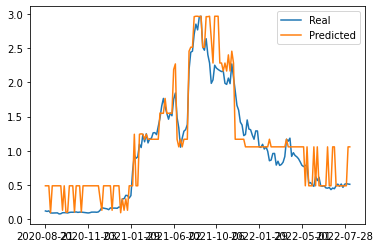

In [ ]:
# plot the comparison of predicted vs actuall
Comparison_df.plot()